## Import Library

In [40]:
import numpy as np
import pandas as pd
from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.regression.linear_model import OLS
from statsmodels.sandbox.sysreg import SUR
from linearmodels.system import SUR

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import het_breuschpagan

## Import Dataset

In [78]:
data = pd.read_csv("C:/Users/rdick/OneDrive/Desktop/phyton_ws/Semester 5/Ekonometrika/Project SUR/Data/IPM (19-21)_csv.csv")
data.head(10)

,Kabupaten,Tahun,IPM,Guru-Siswa (SMA),Sekolah-Siswa (SMA),Akses_Air_Bersih,Jumlah_Sarana_Kesehatan,Kepadatan_Penduduk,Tingkat_Pengangguran_Terbuka,PDRB_Perkapita
0,Kabupaten Bangkalan,2021,64.36,68.0,222.65,90.38,137,1071712,8.07,23014
1,Kabupaten Banyuwangi,2021,71.38,70.0,399.45,94.03,302,1718462,5.42,49996
2,Kabupaten Blitar,2021,71.05,68.0,506.75,94.99,34,1231013,3.66,30722
3,Kabupaten Bojonegoro,2021,69.59,67.0,386.33,92.71,208,1307602,4.82,63811
4,Kabupaten Bondowoso,2021,66.59,68.0,217.85,96.49,48,778525,4.46,27041
5,Kabupaten Gresik,2021,76.50,70.0,351.85,98.18,220,1320570,8.00,109373
6,Kabupaten Jember,2021,67.32,67.0,274.91,93.12,129,2550360,5.44,31787
7,Kabupaten Jombang,2021,73.45,67.0,438.96,97.19,316,1325914,7.09,31486
8,Kabupaten Kediri,2021,72.56,69.0,0.47,92.98,364,1644400,5.15,25961
9,Kabupaten Lamongan,2021,73.12,70.0,246.79,94.01,249,1356027,4.90,30267


## Heat Map

Text(0.5, 1.0, 'Correlation Plot')

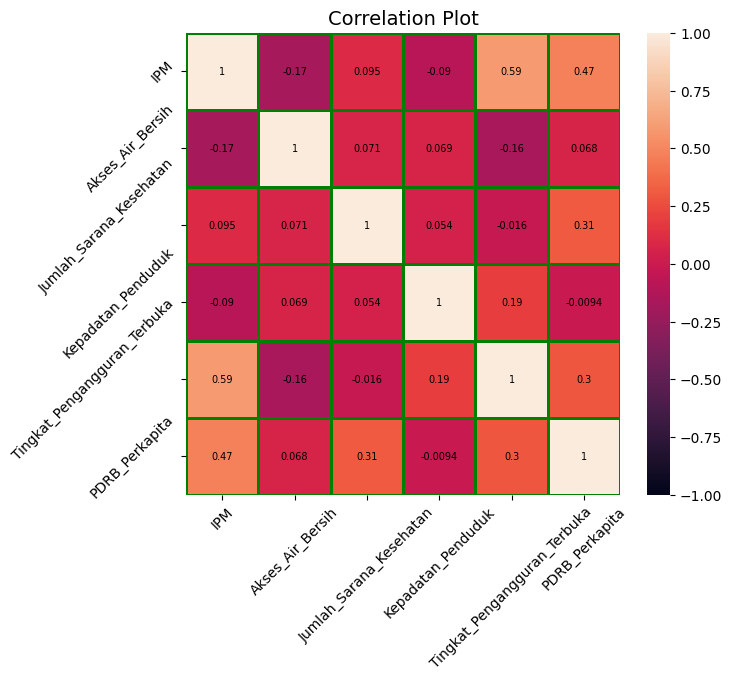

In [90]:
corr_matrix = data[["IPM", "Akses_Air_Bersih","Jumlah_Sarana_Kesehatan","Kepadatan_Penduduk","Tingkat_Pengangguran_Terbuka","PDRB_Perkapita"]].corr()
corr_matrix
fig = plt.figure(figsize=(7,6))
sns.heatmap(corr_matrix,
            linewidths=0.75,
            linecolor='green',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size':7,'color':'black'})
plt.tick_params(labelsize=10,rotation=45)
plt.title("Correlation Plot",size=14)

## Menghitung VIF

In [79]:
x = data[["Akses_Air_Bersih","Jumlah_Sarana_Kesehatan","Kepadatan_Penduduk","Tingkat_Pengangguran_Terbuka","PDRB_Perkapita"]]
y = data["IPM"]
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

                       Variable         VIF
0                         const  268.697478
1              Akses_Air_Bersih    1.058040
2       Jumlah_Sarana_Kesehatan    1.129856
3            Kepadatan_Penduduk    1.063600
4  Tingkat_Pengangguran_Terbuka    1.216982
5                PDRB_Perkapita    1.257679


## Uji Heteroskedastisitas

In [92]:
y_log = np.log(y)
model_log = sm.OLS(y_log, x).fit()

_, p_value_bp_log, _, _ = het_breuschpagan(model_log.resid, model_log.model.exog)
print(f'Uji Breusch-Pagan : p-value = {p_value_bp_log}')
if p_value_bp_log > 0.05:
    print("Tidak terdapat heteroskedastisitas Pada Data")
else:
    print("Terdapat heteroskedastisitas Pada Data")

Uji Breusch-Pagan : p-value = 0.771659972839125
Tidak terdapat heteroskedastisitas Pada Data


## Uji Autokorelasi

In [81]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    IPM   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     20.23
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           3.38e-14
Time:                        00:02:49   Log-Likelihood:                -308.07
No. Observations:                 114   AIC:                             628.1
Df Residuals:                     108   BIC:                             644.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           73.2538      5.693     12.868      0.000      61.970      84.538
Akses_Air_Bersih                -0.0830      0.058     -1.424      0.157      -0.198       0.032
Jumlah_Sarana_Kesehatan          0.0012      0.004      0.308      0.759      -0.006       0.009
Kepadatan_Penduduk           -1.358e-06   5.42e-07     -2.505      0.014   -2.43e-06   -2.84e-07
Tingkat_Pengangguran_Terbuka     1.3140      0.196      6.697      0.000       0.925       1.703
PDRB_Perkapita                2.058e-05   5.06e-06      4.069      0.000    1.06e-05    3.06e-05
==============================================================================
Omnibus:                        7.915   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.019   Jarque-Bera (JB):               10.024
Skew:                          -0.374   Prob(JB):                      0.00666
Kurtosis:                       4.245   Cond. No.                     2.05e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analisis:
1. Berdasarkan uji Durbin Watson, tidak dapat autokorelasi pada data
2. Berdasarkan uji Jarque-Bera (JB), Data berdistribusi normal

## Histogram Plot untuk Disribusi Normal

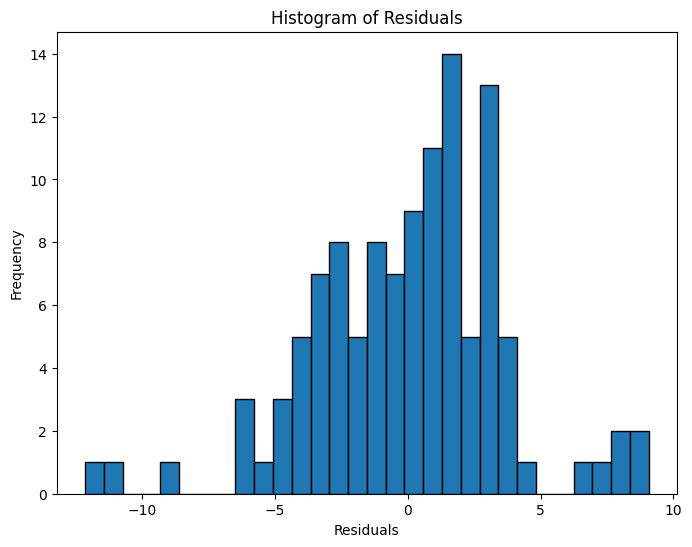

In [82]:
residuals = model.resid
fitted_values = model.fittedvalues

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

## Menentukan Formula

In [83]:
formula_eq1 = "IPM ~ PDRB_Perkapita + Akses_Air_Bersih + Jumlah_Sarana_Kesehatan + Kepadatan_Penduduk + Tingkat_Pengangguran_Terbuka"
formula_eq2 = "PDRB_Perkapita ~ IPM + Akses_Air_Bersih + Jumlah_Sarana_Kesehatan + Kepadatan_Penduduk + Tingkat_Pengangguran_Terbuka"

## Menggabungkan Persamaan

In [84]:
equations = {
    'Eq1': formula_eq1,
    'Eq2': formula_eq2
}

## Melakukan Fitting Model SUR

In [94]:
sur_model = SUR.from_formula(equations, data)
sur_results = sur_model.fit()
print(sur_results)

                           System GLS Estimation Summary                           
Estimator:                        GLS   Overall R-squared:                   0.4902
No. Equations.:                     2   McElroy's R-squared:                 0.0951
No. Observations:                 114   Judge's (OLS) R-squared:             0.1879
Date:                Fri, Nov 29 2024   Berndt's R-squared:                 -0.3169
Time:                        00:21:38   Dhrymes's R-squared:                 0.4902
                                        Cov. Estimator:                      robust
                                        Num. Constraints:                      None
                             Equation: Eq1, Dependent Variable: IPM                             
                              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------------
PDRB_Perkapita                2.147e-